<a href="https://colab.research.google.com/github/palinkapro/ML_ZoomCamp/blob/main/Homework_unit_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 6.10 Homework

The goal of this homework is to create a tree-based regression model for prediction apartment prices (column `'price'`).

In this homework we'll again use the New York City Airbnb Open Data dataset - the same one we used in homework 2 and 3.

You can take it from [Kaggle](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data?select=AB_NYC_2019.csv)
or download from [here](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv)
if you don't want to sign up to Kaggle.

Let's load the data:

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
!gdown 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv'

Downloading...
From: https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv
To: /content/AB_NYC_2019.csv
7.08MB [00:00, 43.1MB/s]


In [3]:
columns = [
    'neighbourhood_group', 'room_type', 'latitude', 'longitude',
    'minimum_nights', 'number_of_reviews','reviews_per_month',
    'calculated_host_listings_count', 'availability_365',
    'price'
]

df = pd.read_csv('AB_NYC_2019.csv', usecols=columns)
df.reviews_per_month = df.reviews_per_month.fillna(0)

* Apply the log tranform to `price`
* Do train/validation/test split with 60%/20%/20% distribution. 
* Use the `train_test_split` function and set the `random_state` parameter to 1

In [4]:
from sklearn.model_selection import train_test_split
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)

y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)

del df_train['price']
del df_val['price']

len(df_train), len(df_val), len(df_test)


(29337, 9779, 9779)

Now, use `DictVectorizer` to turn train and validation into matrices:

In [5]:
from sklearn.feature_extraction import DictVectorizer

dict_train = df_train.fillna(0).to_dict(orient='records')
dict_val = df_val.fillna(0).to_dict(orient='records')

dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(dict_train)
X_val = dv.transform(dict_val)


## Question 1

Let's train a decision tree regressor to predict the price variable. 

* Train a model with `max_depth=1`

In [6]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=1,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

Which feature is used for splitting the data?

* `room_type`
* `neighbourhood_group`
* `number_of_reviews`
* `reviews_per_month`

**Answer:**  room_type

In [7]:
dv.feature_names_[np.argmax(dt.feature_importances_)]

'room_type=Entire home/apt'

[Text(167.4, 163.07999999999998, 'X[12] <= 0.5\nmse = 0.485\nsamples = 29337\nvalue = 4.739'),
 Text(83.7, 54.360000000000014, 'mse = 0.284\nsamples = 14041\nvalue = 4.292'),
 Text(251.10000000000002, 54.360000000000014, 'mse = 0.319\nsamples = 15296\nvalue = 5.149')]

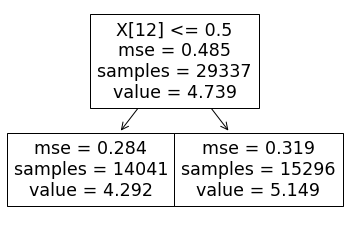

In [8]:
from sklearn import tree
tree.plot_tree(dt)

## Question 2

Train a random forest model with these parameters:

* `n_estimators=10`
* `random_state=1`
* `n_jobs=-1`  (optional - to make training faster)

In [9]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=-1, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [10]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_val, rf.predict(X_val), squared=False)

0.460888788095762

What's the RMSE of this model on validation?

* 0.059
* 0.259
* 0.459
* 0.659

**Answer:** 0.459

## Question 3

Now let's experiment with the `n_estimators` parameter

* Try different values of this parameter from 10 to 200 with step 10
* Set `random_state` to `1`
* Evaluate the model on the validation dataset

In [11]:
metrics = []

for i in range(10, 201, 10):
    rf = RandomForestRegressor(n_estimators=i, random_state=1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    print('%s -> %.3f' % (i, rmse))
    metrics.append(rmse)

10 -> 0.461
20 -> 0.447
30 -> 0.444
40 -> 0.443
50 -> 0.442
60 -> 0.441
70 -> 0.441
80 -> 0.441
90 -> 0.440
100 -> 0.440
110 -> 0.439
120 -> 0.439
130 -> 0.439
140 -> 0.439
150 -> 0.439
160 -> 0.439
170 -> 0.439
180 -> 0.439
190 -> 0.439
200 -> 0.439


In [ ]:
#120

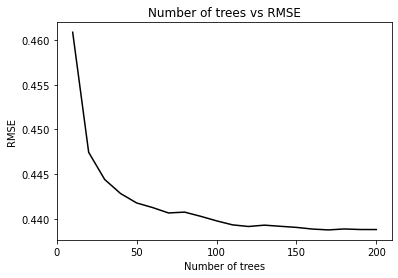

In [12]:
plt.figure(figsize=(6, 4))

plt.plot(range(10, 201, 10), metrics, color='black')
plt.xticks(range(0, 201, 50))

plt.title('Number of trees vs RMSE')
plt.xlabel('Number of trees')
plt.ylabel('RMSE')

# plt.savefig('ch06-figures/06_random_forest_n_estimators.svg')

plt.show()

After which value of `n_estimators` does RMSE stop improving?

- 10
- 50
- 70
- 120

**Answer:** 120

## Question 4

Let's select the best `max_depth`:

* Try different values of `max_depth`: `[10, 15, 20, 25]`
* For each of these values, try different values of `n_estimators` from 10 till 200 (with step 10)
* Fix the random seed: `random_state=1`

In [14]:
all_metrics = {}
for depth in [10, 15, 20, 25]:
    print('depth: %s' % depth)
    metrics = []

    for i in range(10, 201, 10):
        rf = RandomForestRegressor(n_estimators=i, max_depth=depth, random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        rmse = mean_squared_error(y_val, y_pred)
        print('%s -> %.3f' % (i, rmse))
        metrics.append(rmse)
    
    all_metrics[depth] = metrics
    print()


depth: 10
10 -> 0.198
20 -> 0.195
30 -> 0.195
40 -> 0.195
50 -> 0.194
60 -> 0.194
70 -> 0.194
80 -> 0.194
90 -> 0.194
100 -> 0.194
110 -> 0.194
120 -> 0.193
130 -> 0.194
140 -> 0.194
150 -> 0.193
160 -> 0.193
170 -> 0.193
180 -> 0.193
190 -> 0.193
200 -> 0.193

depth: 15
10 -> 0.203
20 -> 0.195
30 -> 0.193
40 -> 0.193
50 -> 0.192
60 -> 0.192
70 -> 0.191
80 -> 0.191
90 -> 0.191
100 -> 0.191
110 -> 0.190
120 -> 0.190
130 -> 0.190
140 -> 0.190
150 -> 0.190
160 -> 0.190
170 -> 0.190
180 -> 0.190
190 -> 0.190
200 -> 0.190

depth: 20
10 -> 0.210
20 -> 0.199
30 -> 0.197
40 -> 0.196
50 -> 0.195
60 -> 0.194
70 -> 0.194
80 -> 0.194
90 -> 0.193
100 -> 0.193
110 -> 0.192
120 -> 0.192
130 -> 0.192
140 -> 0.192
150 -> 0.192
160 -> 0.192
170 -> 0.192
180 -> 0.192
190 -> 0.192
200 -> 0.192

depth: 25
10 -> 0.212
20 -> 0.201
30 -> 0.198
40 -> 0.196
50 -> 0.195
60 -> 0.195
70 -> 0.194
80 -> 0.194
90 -> 0.194
100 -> 0.194
110 -> 0.193
120 -> 0.193
130 -> 0.193
140 -> 0.193
150 -> 0.193
160 -> 0.193
170 -

What's the best `max_depth`:

* 10
* 15
* 20
* 25

Bonus question (not graded):

Will the answer be different if we change the seed for the model?

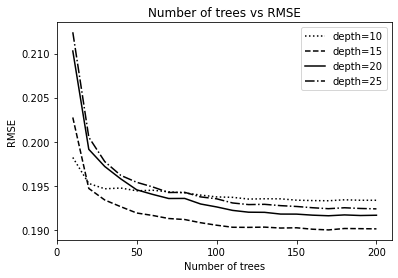

In [17]:
plt.figure(figsize=(6, 4))

num_trees = list(range(10, 201, 10))

plt.plot(num_trees, all_metrics[10], label='depth=10', color='black', linestyle='dotted')
plt.plot(num_trees, all_metrics[15], label='depth=15', color='black', linestyle='dashed')
plt.plot(num_trees, all_metrics[20], label='depth=20', color='black', linestyle='solid')
plt.plot(num_trees, all_metrics[25], label='depth=25', color='black', linestyle='dashdot')
    
plt.xticks(range(0, 201, 50))
plt.legend()

plt.title('Number of trees vs RMSE')
plt.xlabel('Number of trees')
plt.ylabel('RMSE')

plt.show()

**Answer:**  15.    
Yes, it would be a different split

## Question 5

We can extract feature importance information from tree-based models. 

At each step of the decision tree learning algorith, it finds the best split. 
When doint it, we can calculate "gain" - the reduction in impurity before and after the split. 
This gain is quite useful in understanding what are the imporatant features 
for tree-based models.

In Scikit-Learn, tree-based models contain this information in the `feature_importances_` field. 

For this homework question, we'll find the most important feature:

* Train the model with these parametes:
    * `n_estimators=10`,
    * `max_depth=20`,
    * `random_state=1`,
    * `n_jobs=-1` (optional)
* Get the feature importance information from this model

In [18]:
rf = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)
np.argmax(rf.feature_importances_)

12

In [19]:
dv.feature_names_[12]

'room_type=Entire home/apt'

What's the most important feature? 

* `neighbourhood_group=Manhattan`
* `room_type=Entire home/apt`	
* `longitude`
* `latitude`

**Answer:** room_type

## Question 6

Now let's train an XGBoost model! For this question, we'll tune the `eta` parameter

* Install XGBoost
* Create DMatrix for train and validation
* Create a watchlist
* Train a model with these parameters for 100 rounds:

```
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
```

In [20]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=dv.feature_names_)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=dv.feature_names_)

In [21]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

In [22]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [23]:
def parse_xgb_output(output):
    tree = []
    rmse_train = []
    rmse_val = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        tree.append(it)
        rmse_train.append(train)
        rmse_val.append(val)

    return tree, rmse_train, rmse_val

In [24]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=100,
                  evals=watchlist)

In [25]:
tree, _, rmse_val_eta_03 = parse_xgb_output(output)
print(min(rmse_val_eta_03))
print(min(zip(rmse_val_eta_03, tree)))

0.432494
(0.432494, 67)


Now change `eta` first to `0.1` and then to `0.01`

In [26]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=100,
                  evals=watchlist)

In [27]:
tree, _, rmse_val_eta_01 = parse_xgb_output(output)
print(min(rmse_val_eta_01))
print(min(zip(rmse_val_eta_01, tree)))

0.432854
(0.432854, 97)


In [28]:
%%capture output

xgb_params = {
    'eta': 0.01, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=100,
                  evals=watchlist)

In [29]:
tree, _, rmse_val_eta_001 = parse_xgb_output(output)
print(min(rmse_val_eta_001))
print(min(zip(rmse_val_eta_001, tree)))

1.63049
(1.63049, 99)


Which eta leads to the best RMSE score on the validation dataset?

* 0.3
* 0.1
* 0.01

**Answer:** 0.3

## Submit the results


Submit your results here: https://forms.gle/wQgFkYE6CtdDed4w8

It's possible that your answers won't match exactly. If it's the case, select the closest one.


## Deadline


The deadline for submitting is 20 October 2021, 17:00 CET (Wednesday). After that, the form will be closed.

